In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("mymovie.csv")

# Show the first 5 rows
df.head() # or print (data.head())

,ReleaseDate,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,12/15/2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,3/1/2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2/25/2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,11/24/2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,12/22/2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [27]:
# view dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ReleaseDate        9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [26]:
#Exploring genre column
df["Genre"].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [63]:
data.duplicated().sum()

np.int64(0)

In [17]:
# converted 2 column into int type
df['Vote_Count'] = (
    pd.to_numeric(df['Vote_Count'], errors='coerce')
    .fillna(0)
    .astype(int)
)

df['Vote_Average'] = (
    pd.to_numeric(df['Vote_Average'], errors='coerce')
    .fillna(0)
    .astype(int)
)
print(df.dtypes)

ReleaseDate           object
Title                 object
Overview              object
Popularity           float64
Vote_Count             int64
Vote_Average           int64
Original_Language     object
Genre                 object
Poster_Url            object
dtype: object


In [29]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9837.000000,9837.000000
mean,40.320570,1391.386093,6.432266
std,108.874308,2610.258502,1.149494
min,7.100000,0.000000,0.000000
25%,16.127500,146.000000,5.900000
50%,21.191000,443.000000,6.500000
75%,35.174500,1375.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [ ]:
# Summary
.1) We have a data 

In [72]:
df.duplicated().sum()

np.int64(0)

In [30]:
# Casting a column
# Convert Release_Date to datetime
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], errors='coerce')

# Print the dtype
print(df['ReleaseDate'].dtype)

datetime64[ns]


In [31]:
import pandas as pd
# Extract year
df['ReleaseDate'] = df['ReleaseDate'].dt.year.astype('Int64')
print(df['ReleaseDate'].dtype)

Int64


In [34]:
df.head()

,ReleaseDate,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Categorizing the Vote_Average Column #
We cut the Vote_Average column and make 4 Category:`popular`, `avarage`, `below_avaerage`, `not_populat` to describe it more using categorize_col() function

In [2]:
import pandas as pd

def categorize_col(df, col, labels):
    # Ensure column is numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Drop NaNs temporarily to compute edges
    temp = df[col].dropna()
    
    if temp.empty:
        raise ValueError(f"Column '{col}' has no numeric data.")
    
    desc = temp.describe()
    
    edges = [
        desc['min'],
        desc['25%'],
        desc['50%'],
        desc['75%'],
        desc['max']
    ]
    
    # Ensure edges are unique and sorted
    edges = sorted(set(edges))
    
    if len(edges) - 1 != len(labels):
        print(f" Warning: number of bins ({len(edges)-1}) != number of labels ({len(labels)})")
    
    df[col + '_category'] = pd.cut(
        df[col],
        bins=edges,
        labels=labels[:len(edges)-1],
        include_lowest=True,
        duplicates='drop'
    )
    
    return df

In [43]:
labels = ['not_popular', 'below_average', 'average', 'popular']

# call the function
df = categorize_col(df, 'Vote_Average', labels)

# check result
print(df['Vote_Average_category'].unique())
df.head()

['popular', 'below_average', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']


,ReleaseDate,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Vote_Average_category
0,12/15/2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,popular
1,3/1/2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,popular
2,2/25/2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,below_average
3,11/24/2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,popular
4,12/22/2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,average


In [8]:
#dropping Overview, Original_Language, Poster_Url
col= ['Overview', 'Original_Language', 'Poster_Url']

#dropping columns and confirming changes
df.drop(col, axis= 1, inplace= True)
df.columns

Index(['ReleaseDate', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [9]:
df.head()

,ReleaseDate,Title,Popularity,Vote_Count,Vote_Average,Genre
0,12/15/2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,3/1/2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2/25/2022,No Exit,2618.087,122,6.3,Thriller
3,11/24/2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,12/22/2021,The King's Man,1895.511,1793,7,"Action, Adventure, Thriller, War"


In [47]:
#Exploring column
df["Vote_Average_category"].value_counts()

Vote_Average_category
not_popular      2567
popular          2450
average          2411
below_average    2398
Name: count, dtype: int64

In [48]:
# removed all the nan values

df.dropna(inplace= True)
df.isna().sum()

ReleaseDate              0
Title                    0
Popularity               0
Vote_Count               0
Vote_Average             0
Genre                    0
Vote_Average_category    0
dtype: int64

# we'd split genre into list and then explode our dataframe to have only one genre per row for each movie

In [20]:
#Spliting the strings into list
df['Genre'] = df['Genre'].str.split(', ')
df= df.explode('Genre').reset_index(drop=True)
df.head()

,ReleaseDate,Title,Popularity,Vote_Count,Vote_Average,Genre
0,12/15/2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,12/15/2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,12/15/2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,3/1/2022,The Batman,3827.658,1151,8.1,Crime
4,3/1/2022,The Batman,3827.658,1151,8.1,Mystery


In [6]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Action, Adventure',
                  'Action, Adventure, Animation',
                  'Action, Adventure, Animation, Comedy',
                  'Action, Adventure, Animation, Comedy, Family',
                  'Action, Adventure, Animation, Comedy, Romance',
                  'Action, Adventure, Animation, Crime, Family, Mystery',
                  'Action, Adventure, Animation, Drama',
                  'Action, Adventure, Animation, Family',
                  'Action, Adventure, Animation, Family, Comedy',
                  ...
                  'Western, Drama', 'Western, Drama, Action, Adventure',
                  'Western, Drama, Adventure', 'Western, Drama, Crime',
                  'Western, Drama, History', 'Western, Drama, Mystery',
                  'Western, History', 'Western, Horror',
                  'Western, Mystery, Thriller, Drama', 'Western, Thriller'],
, ordered=False, categories_dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ReleaseDate        9837 non-null   object  
 1   Title              9828 non-null   object  
 2   Overview           9828 non-null   object  
 3   Popularity         9827 non-null   float64 
 4   Vote_Count         9827 non-null   object  
 5   Vote_Average       9827 non-null   object  
 6   Original_Language  9827 non-null   object  
 7   Genre              9826 non-null   category
 8   Poster_Url         9826 non-null   object  
dtypes: category(1), float64(1), object(7)
memory usage: 717.0+ KB


In [52]:
df.nunique()

ReleaseDate              5892
Title                    9512
Popularity               8159
Vote_Count               3266
Vote_Average               74
Genre                    2337
Vote_Average_category       4
dtype: int64

In [53]:
df.head()

,ReleaseDate,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category
0,12/15/2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,3/1/2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,2/25/2022,No Exit,2618.087,122,6.3,Thriller,below_average
3,11/24/2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,12/22/2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average


# data visulations #

In [ ]:
sns.set_style('whitegrid')

# what is the most frequent Genre of movie released on Netflix? #

In [26]:
df['Genre'].describe()

count      9826
unique     2337
top       Drama
freq        466
Name: Genre, dtype: object

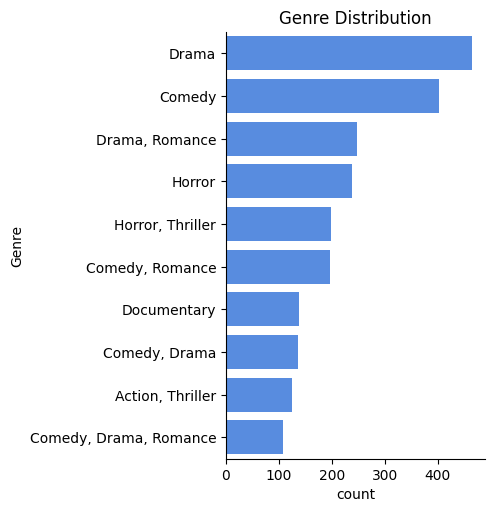

In [13]:
# Plot top 10 genres
top_genres = df['Genre'].value_counts().head(10).index

sns.catplot(
    y='Genre',
    data=df[df['Genre'].isin(top_genres)],
    kind='count',
    order=top_genres,
    color='#4287f5'
)

plt.title('Genre Distribution')
plt.show()

# which has the highest vote avg column #

In [21]:
df.head()

,ReleaseDate,Title,Popularity,Vote_Count,Vote_Average,Genre
0,12/15/2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,12/15/2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,12/15/2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,3/1/2022,The Batman,3827.658,1151,8.1,Crime
4,3/1/2022,The Batman,3827.658,1151,8.1,Mystery


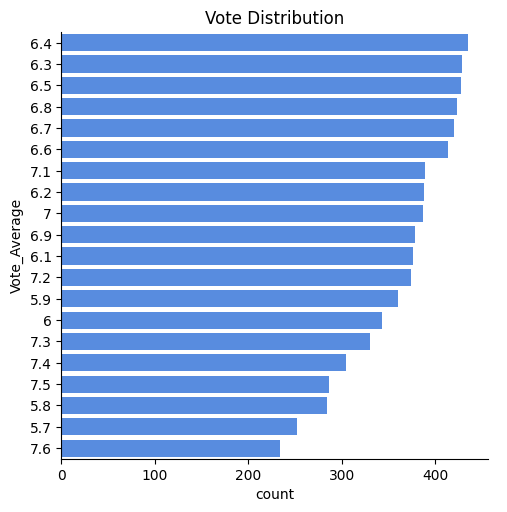

In [18]:
Vote_avg = df['Vote_Average'].value_counts().head(20).index
sns.catplot(
    y='Vote_Average',
    data=df[df['Vote_Average'].isin(Vote_avg )],
    kind='count',
    order= Vote_avg,
    color='#4287f5'
)

plt.title('Vote Distribution')
plt.show()

# What movie got the highest popularity? what's its genre? #

In [22]:
df.head(2)

,ReleaseDate,Title,Popularity,Vote_Count,Vote_Average,Genre
0,12/15/2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,12/15/2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure


In [23]:
df[df['Popularity'] == df['Popularity'].max()]

,ReleaseDate,Title,Popularity,Vote_Count,Vote_Average,Genre
0,12/15/2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,12/15/2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,12/15/2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction


# What movie got the lowest popularity? what's its genre #

In [64]:
df[df['Popularity'] == df['Popularity'].min()]

,ReleaseDate,Title,Popularity,Vote_Count,Vote_Average,Genre
3144,NaT,61.328,7.1,en,Animation,NaN


# Which year has the most filmed movies? #

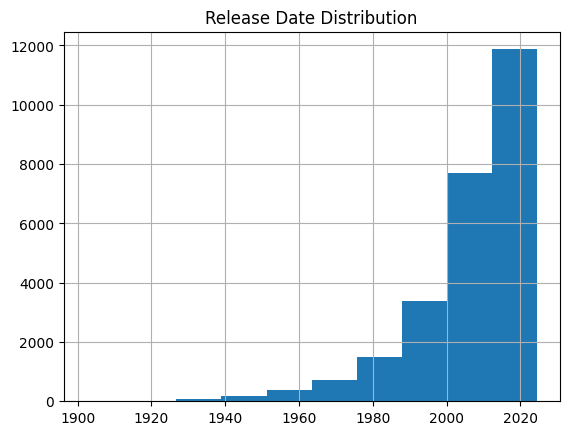

In [62]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], errors='coerce')
df['ReleaseDate'].hist()
plt.title('Release Date Distribution')
plt.show()